<a href="https://colab.research.google.com/github/KT421/Data201Proj1/blob/main/Data201Proj1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA 201 Project 1

[GitHub repo](https://github.com/KT421/Data201Proj1)

## Project Requirements

1. Introduction: Give the details on the source of your data, its content, and some
questions you are interested in. The data should have at least 1000 rows
2. Prepare and wrangle your data with Pandas and Numpy
3. Use EDA principles and the Matplotlib / Seaborn packages to visualize the data.
4. Use at least two of the following depending on your question of interest: histogram,
barplot, boxplot, or scatterplot
5. Simulate a nonparametric inference of the Median for a quantitative variable
6. The sample size should be about 10% of the data. Use random sampling for the
rows
7. Submit a link to the GitHub URL.
8. Present in the class




# DATA INFO

This data set was retreieved from the NSF Award Search at https://www.nsf.gov/awardsearch/advancedSearch.jsp

It's a list of all awards made by NSF in FY2020 (Oct 1, 2019 - Sept 30, 2020). I had to retrieve it in several chunks becasue the downloads were limited to 3000 rows. 

The raw data we used can be viewed and downloaded at: https://drive.google.com/file/d/1x_JuHRh6VY-w1xUeECp3yDxONriL5ofe/view?usp=sharing (Google Drive link because file was too large for GitHub)

Included data:

* **Unnamed** - row numbers, need to remove
* **AwardNumber** - 7 digit award id number
* **NSFOrganization** - Managing division within NSF
* **Program(s)** - Names of the funding program(s), comma separated
* **StartDate** - Official start of the funded project
* **LastAmendmentDate** - Last time the award was modified or new funds were granted
* **PrincipalInvestigator** - Project Lead
* **State**
* **Organziation** - Grantee organization
* **AwardInstrument** - "Standard Grant" means funds distrubuted as a single lump, "Continuing Grant" means funds distributed annually pending satisfactory annual report
* **ProgramManager** - NSF Program Officer overseeing the award
* **EndDate** - Award end date
* **AwardedAmountToDate** - Total funds already disbursed to project. For Continuing Grants, does not include future increments.
* **PIEmailAddress**-**OrganziationPhone** - contact info for the grantee
* **NSFDirectorate** - Managing directorate within NSF
* **ProgramElementCode(s)** - 4 character codes corresponding to Program. Exact relationship to **Program(s)** field. Comma separated.
* **ProgramReferenceCodes(s)** - Non-program tags. May be related to content or funding mechanism (e.g. CAREER is 1045, COVID-19 is 096Z)
* **ARRAAmount** - Amount from the American Recovery and Reinvestment Act (ARRA) funding
* **Abstract** - Plaintext description of project

## EDA Questions:

* What is the distribution of AwardedAmountToDate by state?
* What is the distribution of AwardedAmountToDate by directorate?


In [24]:
#read in data 
#mount google drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
#read in data

import pandas as pd

nsf_data = pd.read_table('/content/drive/My Drive/School/nsf_awards_fy2020.csv',sep=',')
nsf_data.head()

,Unnamed: 0,AwardNumber,Title,NSFOrganization,Program(s),StartDate,LastAmendmentDate,PrincipalInvestigator,State,Organization,AwardInstrument,ProgramManager,EndDate,AwardedAmountToDate,Co-PIName(s),PIEmailAddress,OrganizationStreet,OrganizationCity,OrganizationState,OrganizationZip,OrganizationPhone,NSFDirectorate,ProgramElementCode(s),ProgramReferenceCode(s),ARRAAmount,Abstract
0,1,2053160,Empowering Informal Educators to Prepare Futur...,DRL,"ITEST-Inov Tech Exp Stu & Teac, AISL",10/01/2020,10/29/2020,Sherry Hsi,CO,BSCS Science Learning,Continuing Grant,Toni Dancstep,09/30/2023,"$2,279,188.00",Darrell Porcello,shsi@bscs.org,5415 Mark Dabling Boulevard,Colorado Springs,CO,809183842,7.195316e+09,EHR,"7227, 7259",NaN,$0.00,"Wireless radio communications, such as Wi-Fi, ..."
1,2,2031175,Inclusive Data Science Education for Rural Ele...,DRL,CSforAll-Computer Sci for All,09/01/2020,10/29/2020,Danielle Herro,SC,Clemson University,Standard Grant,Monica Cardella,08/31/2023,"$953,126.00","Matthew Madison, Golnaz Arastoopour Irgens, Sh...",dherro@clemson.edu,230 Kappa Street,CLEMSON,SC,296345701,8.646562e+09,EHR,134Y,"023Z, 1545, 8212, 8817, 9150",$0.00,Scalable and agile approaches are needed to in...
2,3,2032226,RAPID: Developing and Researching Youth-Driven...,DRL,ITEST-Inov Tech Exp Stu & Teac,07/01/2020,06/16/2020,Ed Madison,OR,University of Oregon Eugene,Standard Grant,Alicia Santiago Gonzalez,06/30/2021,"$151,040.00","Jenefer Husman, Ross Anderson, Matthew Kim",madison2@uoregon.edu,5219 UNIVERSITY OF OREGON,Eugene,OR,974035219,5.413465e+09,EHR,7227,"096Z, 7914",$0.00,"During the COVID-19 pandemic, numerous media s..."
3,4,2022709,International Conference on Quantitative Ethno...,DRL,ECR-EHR Core Research,08/01/2020,04/21/2020,Eric Hamilton,CA,Pepperdine University,Standard Grant,Finbarr Sloane,07/31/2021,"$50,000.00",Danielle Espino,eric.hamilton@pepperdine.edu,24255 Pacific Coast Hwy,Malibu,CA,902634819,3.105065e+09,EHR,7980,"7556, 8817",$0.00,This project was submitted in response to EHR ...
4,5,1949230,Developing and Testing Bilingual Curricula tha...,DRL,ITEST-Inov Tech Exp Stu & Teac,09/01/2020,05/03/2020,Sylvia Celedon-Pattichis,NM,University of New Mexico,Standard Grant,Alicia Santiago Gonzalez,08/31/2025,"$1,499,940.00","Marios Pattichis, Carlos LopezLeiva",sceledon@unm.edu,"1700 Lomas Blvd. NE, Suite 2200",Albuquerque,NM,871310001,5.052774e+09,EHR,7227,9150,$0.00,The scientific careers of the future increasin...


## Data Cleaning & Wrangling

Need to: 
* Drop unneeded columns: Unnamed,LastAmendmentDate,Contact Info Columns,ARRA
* Change Award Amount to an integer (drop the $)

In [26]:
#drop columns
nsf_data = nsf_data.drop(columns=['Unnamed: 0','LastAmendmentDate','PIEmailAddress','OrganizationStreet','OrganizationCity','OrganizationState','OrganizationZip','OrganizationPhone','ARRAAmount'])
nsf_data.head()

,AwardNumber,Title,NSFOrganization,Program(s),StartDate,PrincipalInvestigator,State,Organization,AwardInstrument,ProgramManager,EndDate,AwardedAmountToDate,Co-PIName(s),NSFDirectorate,ProgramElementCode(s),ProgramReferenceCode(s),Abstract
0,2053160,Empowering Informal Educators to Prepare Futur...,DRL,"ITEST-Inov Tech Exp Stu & Teac, AISL",10/01/2020,Sherry Hsi,CO,BSCS Science Learning,Continuing Grant,Toni Dancstep,09/30/2023,"$2,279,188.00",Darrell Porcello,EHR,"7227, 7259",NaN,"Wireless radio communications, such as Wi-Fi, ..."
1,2031175,Inclusive Data Science Education for Rural Ele...,DRL,CSforAll-Computer Sci for All,09/01/2020,Danielle Herro,SC,Clemson University,Standard Grant,Monica Cardella,08/31/2023,"$953,126.00","Matthew Madison, Golnaz Arastoopour Irgens, Sh...",EHR,134Y,"023Z, 1545, 8212, 8817, 9150",Scalable and agile approaches are needed to in...
2,2032226,RAPID: Developing and Researching Youth-Driven...,DRL,ITEST-Inov Tech Exp Stu & Teac,07/01/2020,Ed Madison,OR,University of Oregon Eugene,Standard Grant,Alicia Santiago Gonzalez,06/30/2021,"$151,040.00","Jenefer Husman, Ross Anderson, Matthew Kim",EHR,7227,"096Z, 7914","During the COVID-19 pandemic, numerous media s..."
3,2022709,International Conference on Quantitative Ethno...,DRL,ECR-EHR Core Research,08/01/2020,Eric Hamilton,CA,Pepperdine University,Standard Grant,Finbarr Sloane,07/31/2021,"$50,000.00",Danielle Espino,EHR,7980,"7556, 8817",This project was submitted in response to EHR ...
4,1949230,Developing and Testing Bilingual Curricula tha...,DRL,ITEST-Inov Tech Exp Stu & Teac,09/01/2020,Sylvia Celedon-Pattichis,NM,University of New Mexico,Standard Grant,Alicia Santiago Gonzalez,08/31/2025,"$1,499,940.00","Marios Pattichis, Carlos LopezLeiva",EHR,7227,9150,The scientific careers of the future increasin...


In [27]:
#convert AwardedAmountToDate to float
nsf_data['AwardedAmountToDate'] = nsf_data['AwardedAmountToDate'].str.replace('$', '')
nsf_data['AwardedAmountToDate'] = nsf_data['AwardedAmountToDate'].str.replace(',', '').astype(float)
nsf_data.head()

,AwardNumber,Title,NSFOrganization,Program(s),StartDate,PrincipalInvestigator,State,Organization,AwardInstrument,ProgramManager,EndDate,AwardedAmountToDate,Co-PIName(s),NSFDirectorate,ProgramElementCode(s),ProgramReferenceCode(s),Abstract
0,2053160,Empowering Informal Educators to Prepare Futur...,DRL,"ITEST-Inov Tech Exp Stu & Teac, AISL",10/01/2020,Sherry Hsi,CO,BSCS Science Learning,Continuing Grant,Toni Dancstep,09/30/2023,2279188.0,Darrell Porcello,EHR,"7227, 7259",NaN,"Wireless radio communications, such as Wi-Fi, ..."
1,2031175,Inclusive Data Science Education for Rural Ele...,DRL,CSforAll-Computer Sci for All,09/01/2020,Danielle Herro,SC,Clemson University,Standard Grant,Monica Cardella,08/31/2023,953126.0,"Matthew Madison, Golnaz Arastoopour Irgens, Sh...",EHR,134Y,"023Z, 1545, 8212, 8817, 9150",Scalable and agile approaches are needed to in...
2,2032226,RAPID: Developing and Researching Youth-Driven...,DRL,ITEST-Inov Tech Exp Stu & Teac,07/01/2020,Ed Madison,OR,University of Oregon Eugene,Standard Grant,Alicia Santiago Gonzalez,06/30/2021,151040.0,"Jenefer Husman, Ross Anderson, Matthew Kim",EHR,7227,"096Z, 7914","During the COVID-19 pandemic, numerous media s..."
3,2022709,International Conference on Quantitative Ethno...,DRL,ECR-EHR Core Research,08/01/2020,Eric Hamilton,CA,Pepperdine University,Standard Grant,Finbarr Sloane,07/31/2021,50000.0,Danielle Espino,EHR,7980,"7556, 8817",This project was submitted in response to EHR ...
4,1949230,Developing and Testing Bilingual Curricula tha...,DRL,ITEST-Inov Tech Exp Stu & Teac,09/01/2020,Sylvia Celedon-Pattichis,NM,University of New Mexico,Standard Grant,Alicia Santiago Gonzalez,08/31/2025,1499940.0,"Marios Pattichis, Carlos LopezLeiva",EHR,7227,9150,The scientific careers of the future increasin...


# EDA
Plot award amounts by DIR & awd instrument   
Plot award totals by state



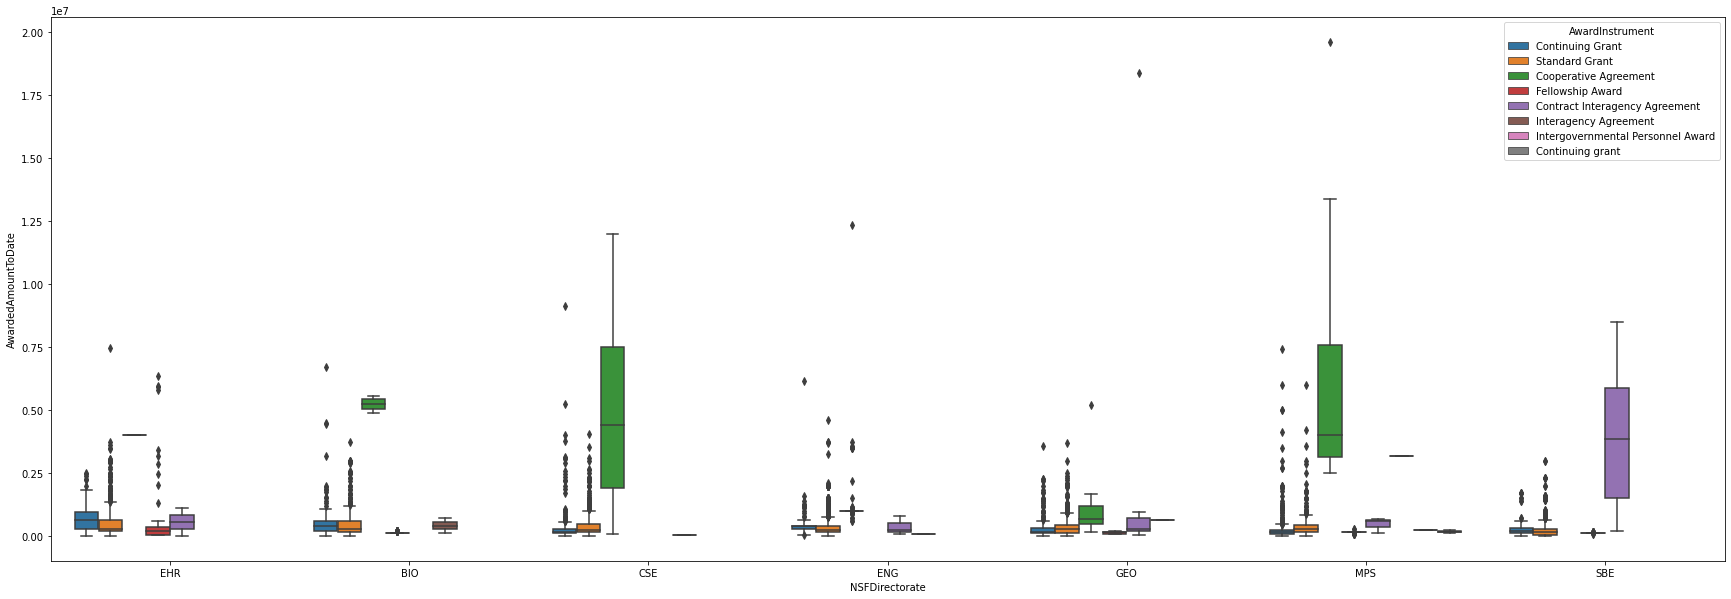

In [28]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

awds_by_dir = sns.boxplot(x="NSFDirectorate",
                        y="AwardedAmountToDate",
                        hue="AwardInstrument",
                        data=nsf_data)
plt.rcParams['figure.figsize'] = [30, 10]
plt.show()

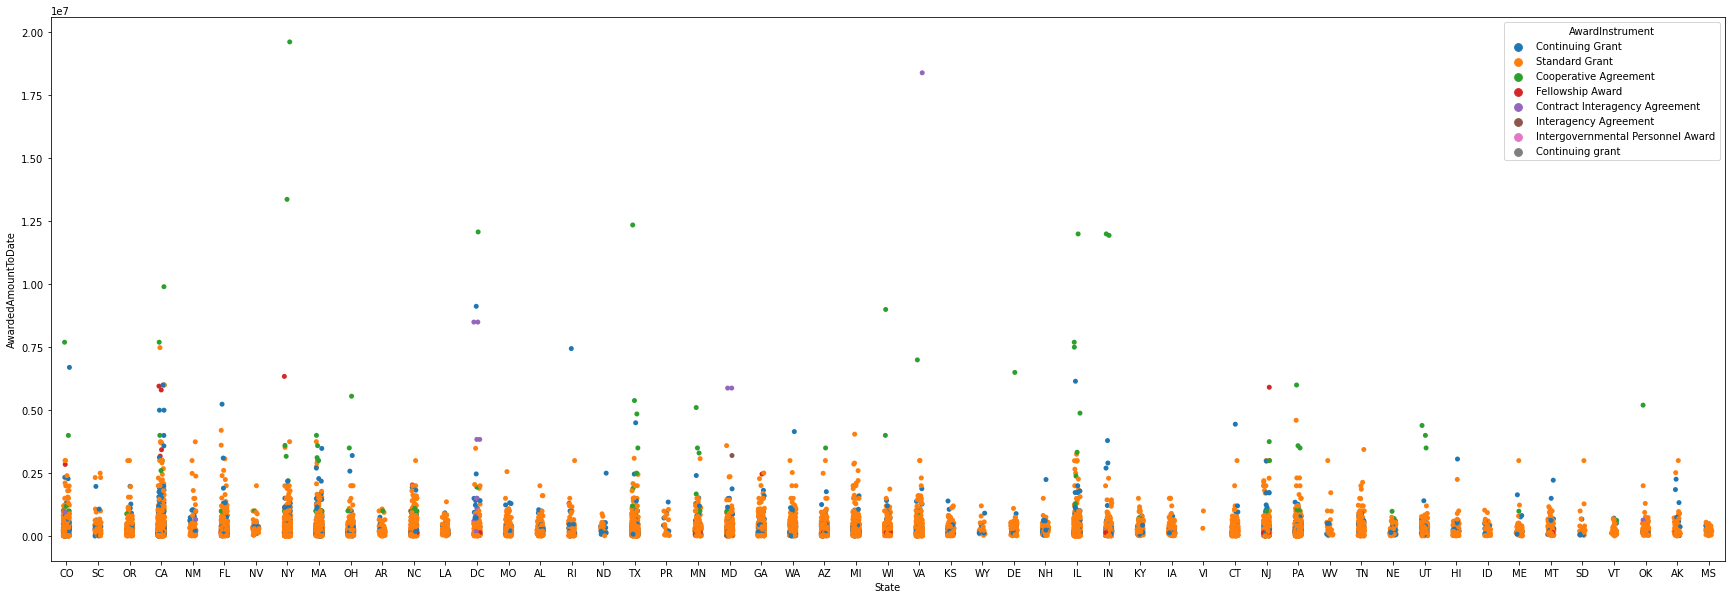

In [29]:
awds_by_state = sns.stripplot(x="State",
                        y="AwardedAmountToDate",
                        hue="AwardInstrument",
                        data=nsf_data)
plt.rcParams['figure.figsize'] = [30, 10]
plt.show()

Based on these plots, I think we should look exclusively at research grants, excluding fellowships, IPAs, Interagency Agreements and Cooperative Agreements. There aren't very many of the latter types and their sizes are all over the place.

In [30]:
nsf_grants_only = nsf_data.query("AwardInstrument == 'Continuing Grant' | AwardInstrument == 'Standard Grant' | AwardInstrument == 'Continuing grant'" )
# I tried several ways to filter and this is inelegant but it's the way that worked

nsf_data.head()

,AwardNumber,Title,NSFOrganization,Program(s),StartDate,PrincipalInvestigator,State,Organization,AwardInstrument,ProgramManager,EndDate,AwardedAmountToDate,Co-PIName(s),NSFDirectorate,ProgramElementCode(s),ProgramReferenceCode(s),Abstract
0,2053160,Empowering Informal Educators to Prepare Futur...,DRL,"ITEST-Inov Tech Exp Stu & Teac, AISL",10/01/2020,Sherry Hsi,CO,BSCS Science Learning,Continuing Grant,Toni Dancstep,09/30/2023,2279188.0,Darrell Porcello,EHR,"7227, 7259",NaN,"Wireless radio communications, such as Wi-Fi, ..."
1,2031175,Inclusive Data Science Education for Rural Ele...,DRL,CSforAll-Computer Sci for All,09/01/2020,Danielle Herro,SC,Clemson University,Standard Grant,Monica Cardella,08/31/2023,953126.0,"Matthew Madison, Golnaz Arastoopour Irgens, Sh...",EHR,134Y,"023Z, 1545, 8212, 8817, 9150",Scalable and agile approaches are needed to in...
2,2032226,RAPID: Developing and Researching Youth-Driven...,DRL,ITEST-Inov Tech Exp Stu & Teac,07/01/2020,Ed Madison,OR,University of Oregon Eugene,Standard Grant,Alicia Santiago Gonzalez,06/30/2021,151040.0,"Jenefer Husman, Ross Anderson, Matthew Kim",EHR,7227,"096Z, 7914","During the COVID-19 pandemic, numerous media s..."
3,2022709,International Conference on Quantitative Ethno...,DRL,ECR-EHR Core Research,08/01/2020,Eric Hamilton,CA,Pepperdine University,Standard Grant,Finbarr Sloane,07/31/2021,50000.0,Danielle Espino,EHR,7980,"7556, 8817",This project was submitted in response to EHR ...
4,1949230,Developing and Testing Bilingual Curricula tha...,DRL,ITEST-Inov Tech Exp Stu & Teac,09/01/2020,Sylvia Celedon-Pattichis,NM,University of New Mexico,Standard Grant,Alicia Santiago Gonzalez,08/31/2025,1499940.0,"Marios Pattichis, Carlos LopezLeiva",EHR,7227,9150,The scientific careers of the future increasin...


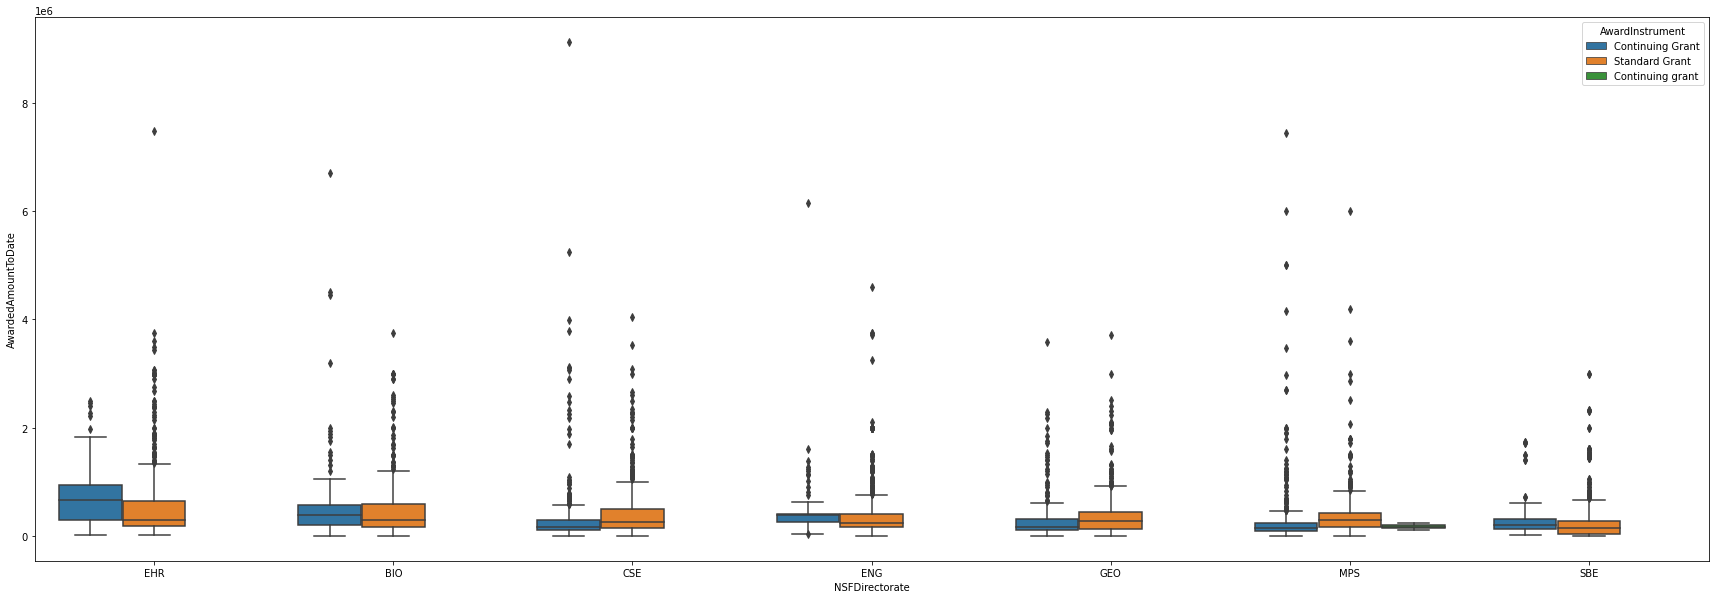

In [31]:
#replot earlier plots

grants_by_dir = sns.boxplot(x="NSFDirectorate",
                        y="AwardedAmountToDate",
                        hue="AwardInstrument",
                        data=nsf_grants_only)
plt.rcParams['figure.figsize'] = [30, 10]
plt.show()

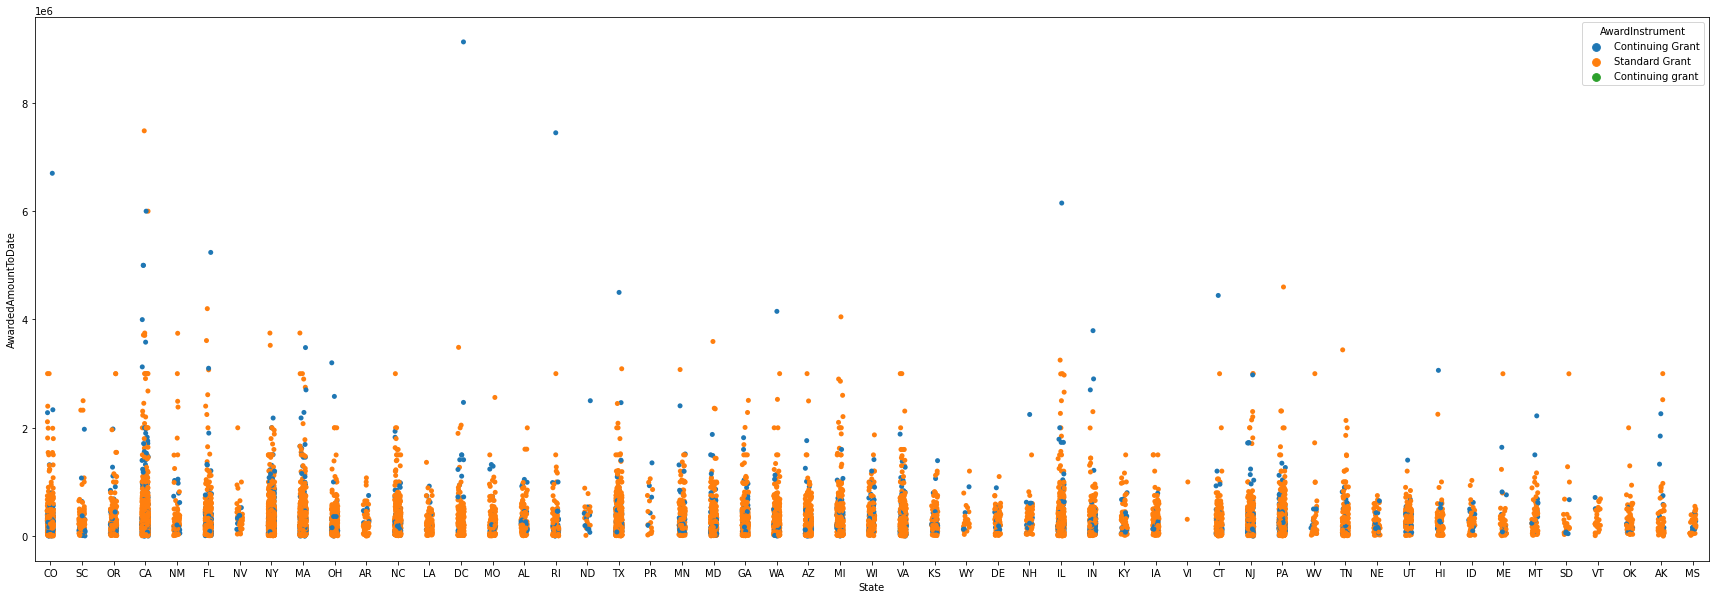

In [32]:
grants_by_state = sns.stripplot(x="State",
                        y="AwardedAmountToDate",
                        hue="AwardInstrument",
                        data=nsf_grants_only)
plt.rcParams['figure.figsize'] = [30, 10]
plt.show()

# Bootstrapping

Nonparametric inference of the mean of `AwardedAmountToDate`

In [33]:
award_array = nsf_grants_only['AwardedAmountToDate'].values

In [34]:
print(type(award_array))

<class 'numpy.ndarray'>


In [35]:
###import numpy as np
###award_sample = np.random.choice(award_array, 1300)  #I don't think we need this code but I kept it here just for my own records
###print(award_sample)

In [36]:
import numpy as np
import pandas as pd
med_boot_samples = []
for i in range(1000):
                boot_random_sample = np.random.choice(award_array, 1300)
                med_boot_samples.append(np.median(boot_random_sample))
        
np.median(med_boot_samples)

248928.75

In [37]:
conf_int = np.percentile(med_boot_samples, [2.5, 97.5]) # The middle 95% interval
conf_int

array([225307.3875, 255373.5375])

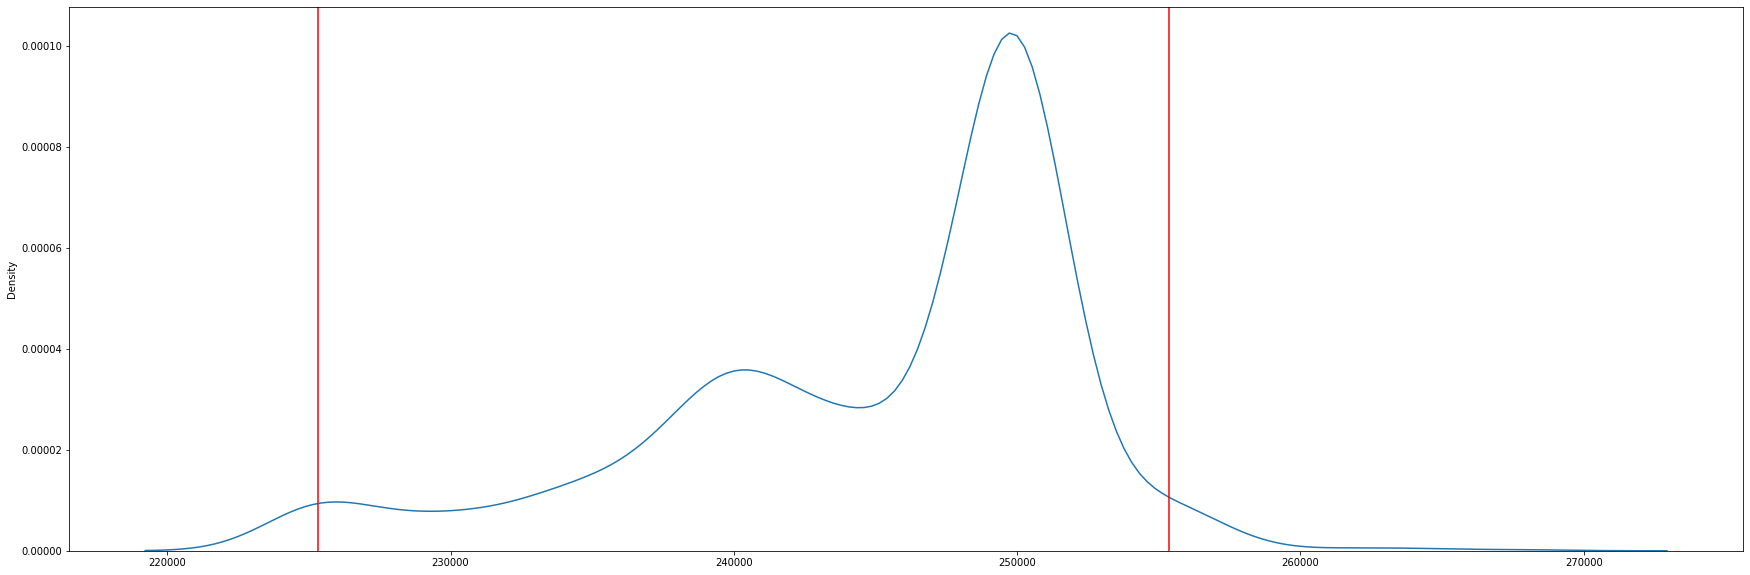

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(med_boot_samples)
for endpoint in conf_int:
    plt.axvline(endpoint, color='red')

In [39]:
from sklearn.utils import resample
med_boot_samples = []
for i in range(1000):
                boot_sample = resample(award_array) # does bootstrap; replace = True
                med_boot_samples.append(np.median(boot_random_sample))
        
np.median(med_boot_samples)

249908.5